In [573]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import log as ln

# Data preparation

##### Feature description
- Name: record name
- Netflows: number of net flow
- First Protocol:        

In [574]:
# Import dataset
data = pd.read_csv('pure_data_miner.csv')
data

,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,Id_Cryptocurrency
0,176,29-csves/3.csv,6,TCP,NaN,NaN,93.88275,241.4400,242.21475,1057.191,...,51748.0,11.50,16.0,21.25,478.00,2669.0,11625.00,mine,Bitcoin,1
1,1328,682-csves/0.csv,483,TCP,UDP,NaN,0.00000,0.0020,3.00200,2609.420,...,80.0,1.00,2.0,11.00,32.00,80.0,1158.00,not_mine,NaN,0
2,33,9-csves/4.csv,4,TCP,NaN,NaN,231.44000,231.4400,231.44000,925.760,...,NaN,8.00,8.0,8.00,330.00,1005.5,1681.00,mine,Monero,5
3,126,66-csves/0.csv,18,TCP,UDP,NaN,75.77875,103.6600,135.16800,1825.739,...,1900.0,3.00,4.0,6.00,96.00,128.0,234.00,not_mine,NaN,0
4,15,8-csves/0.csv,47,TCP,UDP,NaN,3.00500,89.6120,149.42500,4189.142,...,1900.0,4.00,5.0,7.00,116.00,188.0,280.00,not_mine,NaN,0
5,279,143-csves/1.csv,37,UDP,TCP,NaN,0.00000,0.0000,3.00300,91.370,...,53.0,1.00,1.0,3.00,48.00,64.0,96.00,not_mine,NaN,0
6,647,78-csves/11.csv,2,TCP,NaN,NaN,406.31200,406.3250,406.33800,812.650,...,NaN,229.50,236.0,242.50,21347.00,32006.0,42665.00,mine,Etherium,4
7,29,4-csves/5.csv,2,TCP,NaN,NaN,241.91000,241.9100,241.91000,483.820,...,NaN,17.75,19.5,21.25,3828.50,7179.0,10529.50,mine,Bitcoin,1
8,518,266-csves/1.csv,32,TCP,UDP,NaN,3.00425,121.8585,180.73375,3525.283,...,1900.0,4.00,4.5,5.25,116.00,160.0,256.00,not_mine,NaN,0
9,1346,691-csves/1.csv,21,TCP,UDP,NaN,75.77600,104.4100,149.65300,2214.031,...,1900.0,3.00,5.0,7.00,96.00,160.0,248.00,not_mine,NaN,0


In [575]:
# Initial information at data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 34 columns):
index                4206 non-null int64
Name                 4206 non-null object
Netflows             4206 non-null int64
First_Protocol       4206 non-null object
Second_Protocol      1824 non-null object
Third_Protocol       113 non-null object
p1_d                 4206 non-null float64
p2_d                 4206 non-null float64
p3_d                 4206 non-null float64
duration             4206 non-null float64
max_d                4206 non-null float64
min_d                4206 non-null float64
#packets             4206 non-null int64
Avg_bps              4206 non-null int64
Avg_pps              4206 non-null int64
Avg_bpp              4206 non-null int64
#Bytes               4206 non-null int64
#sp                  4206 non-null int64
#dp                  4206 non-null int64
first_sp             4206 non-null int64
second_sp            4181 non-null float64
third_sp       

- These are features numeric: index, Netflows, p1_d, p2_d, p3_d, duration, max_d, min_d, #packets, Avg_bps, Avg_pps, Avg_bpp, #Bytes, #sp, #dp, first_sp, second_sp, third_sp, first_dp, second_dp, third_dp, p1_ip, p2_ip, p3_ip, p1_ib, p2_ib, p3_ib, Id_Cryptocurrency

- These are features object: Name, First_Protocol, Second_Protocol, Third_Protocol, Type, Cryptocurrency

In [576]:
avalible = data.notnull()
avalible.apply(pd.Series.value_counts)

,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,Id_Cryptocurrency
False,NaN,NaN,NaN,NaN,2382,4093,NaN,NaN,NaN,NaN,...,2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN
True,4206.0,4206.0,4206.0,4206.0,1824,113,4206.0,4206.0,4206.0,4206.0,...,2080,4206.0,4206.0,4206.0,4206.0,4206.0,4206.0,4206.0,2198,4206.0


The features with null are data: 
- Second_Protocol: 2382 null data
- Third_Protocol: 4093 null data
- Second_sp: 4181 null data            
- Third_sp: 2008 null data  
- second_dp: 4181 null data
- Third_dp: 2126 null data
- Cryptocurrency: 2008 data

# Data Structuring

In [577]:
#  I group the numeric and object columns names
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

In [578]:
data_numeric_int

['index',
 'Netflows',
 '#packets',
 'Avg_bps',
 'Avg_pps',
 'Avg_bpp',
 '#Bytes',
 '#sp',
 '#dp',
 'first_sp',
 'first_dp',
 'Id_Cryptocurrency']

# Quantitative inspection of ungrouped data

In [579]:
data[data_object].describe()

,Name,First_Protocol,Second_Protocol,Third_Protocol,Type,Cryptocurrency
count,4206,4206,1824,113,4206,2198
unique,2951,4,4,3,2,5
top,37-csves/0.csv,TCP,UDP,ICMP6,mine,Etherium
freq,6,3784,1587,80,2198,950


In [580]:
data[data_numeric_int].describe()

,index,Netflows,#packets,Avg_bps,Avg_pps,Avg_bpp,#Bytes,#sp,#dp,first_sp,first_dp,Id_Cryptocurrency
count,4206.000000,4206.000000,4206.000000,4.206000e+03,4206.000000,4206.000000,4.206000e+03,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000
mean,638.187351,87.487161,2424.252021,7.458727e+04,12.436519,363.484784,1.843929e+06,32.511650,31.142416,11197.241084,11935.976938,1.652164
std,561.469112,180.818403,7094.413734,2.264702e+05,29.967896,290.662978,7.103081e+06,58.360577,57.338898,20480.534440,21068.128465,1.799862
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,3.300000e+01,1.000000,1.000000,0.000000,53.000000,0.000000
25%,175.000000,2.000000,54.000000,4.742500e+02,0.000000,133.000000,1.490450e+04,2.000000,2.000000,443.000000,443.000000,0.000000
50%,446.000000,16.000000,316.500000,1.258000e+03,1.000000,298.500000,3.661600e+04,2.000000,2.000000,3332.000000,3332.000000,1.000000
75%,955.750000,89.000000,2197.000000,5.880000e+04,17.000000,532.000000,9.809762e+05,41.000000,37.750000,4444.000000,4444.000000,4.000000
max,2007.000000,2873.000000,198794.000000,7.161568e+06,681.000000,1379.000000,2.611430e+08,711.000000,709.000000,64790.000000,64790.000000,5.000000


In [581]:
data[data_numeric_float].describe()

,p1_d,p2_d,p3_d,duration,max_d,min_d,second_sp,third_sp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib
count,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4181.000000,2080.000000,4181.000000,2080.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000
mean,143.503209,158.487376,178.742003,3453.956941,218.237708,132.717926,23314.365463,17846.543750,22370.182253,10285.657692,26.211900,29.230266,34.891643,2961.058072,5078.647408,7886.904779
std,190.726531,185.175821,177.188170,7066.771973,161.007111,195.317732,26272.919799,23697.881018,25940.060213,19394.697287,62.306857,64.027147,66.536121,6029.233629,9150.316407,12198.427434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,53.000000,1.000000,1.000000,1.000000,16.000000,20.000000,28.500000
25%,0.000000,3.004000,34.788625,536.660500,91.990750,0.000000,80.000000,80.000000,80.000000,80.000000,1.000000,3.000000,5.000000,48.000000,96.000000,248.000000
50%,20.092375,62.302750,116.013875,1033.121000,195.026000,0.000000,4444.000000,123.000000,4444.000000,443.000000,4.000000,8.000000,13.000000,274.000000,774.500000,2562.000000
75%,266.117813,267.590125,271.319625,3174.946750,287.550750,266.009250,53565.000000,44701.750000,52764.000000,1900.000000,18.000000,20.500000,25.500000,3587.500000,6817.500000,10542.500000
max,599.533000,599.533000,599.533000,93517.902000,599.533000,599.533000,64790.000000,65447.000000,64790.000000,60989.000000,389.000000,395.000000,401.000000,40346.000000,52882.000000,71027.000000


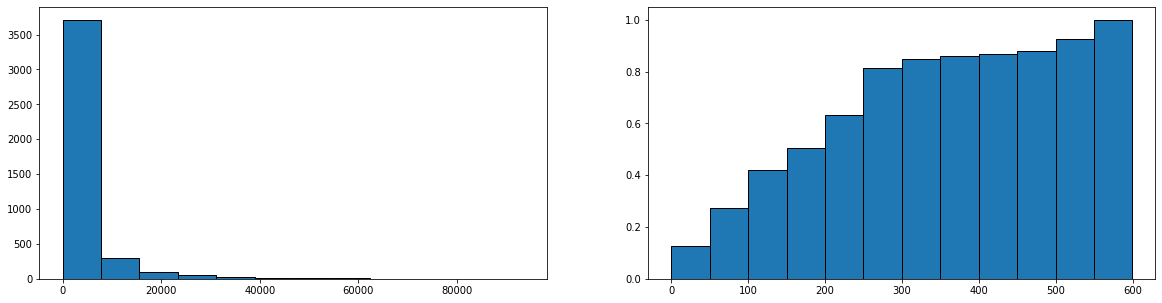

In [582]:
plt.figure(figsize=(20,5))
ax = plt.subplot(121)
ax = plt.hist(data['duration'], bins=m, edgecolor='black')
ax = plt.subplot(122)
ax = plt.hist(data['max_d'], bins=m, edgecolor='black',cumulative=True,density=1)
plt.show()

In [583]:
def bar_plot(x):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data,edgecolor='black')
    ax.set_xlabel(x)
    ax.set_ylabel('Frecuencias n')
    ax.set_title(f'bar plot of {x}')
    plt.show()

In [584]:
def hist_plot(x,m):
    plt.figure(figsize=(20,5))
    x1 = plt.subplot(121)
    x1 = plt.hist(data[x], bins=m, edgecolor='black')
    x1 = plt.ylabel('ni')
    x1 = plt.xlabel(x)
    x1 = plt.title(f"{x} Distribution")
    x2 = plt.subplot(122)
    x2 = plt.hist(data[x], bins=m, edgecolor='black', cumulative=True,density=1)
    x2 = plt.ylabel('Fi')
    x2 = plt.xlabel(x)
    x2 = plt.title(f"{x} Cumulative Distribution")
    plt.show()

In [585]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3]    

In [586]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

In [587]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

In [588]:
def made_frequency_table(x, date,t):
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {x:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic    

In [589]:
tables_frequency = []
for i in data_numeric_float:
    tables_frequency.append(made_frequency_table(i, data,1))

In [590]:
data_object

['Name',
 'First_Protocol',
 'Second_Protocol',
 'Third_Protocol',
 'Type',
 'Cryptocurrency']

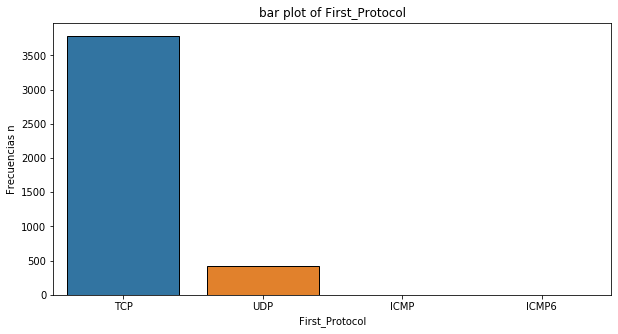

TCP      3784
UDP       420
ICMP        1
ICMP6       1
Name: First_Protocol, dtype: int64
El protocolo mas utilizado en el conjunto de datos es el TCP con 3784


In [591]:
bar_plot('First_Protocol')
v = data['First_Protocol'].value_counts()[0]
print(data['First_Protocol'].value_counts())
print(f'El protocolo mas utilizado en el conjunto de datos es el TCP con {v}')

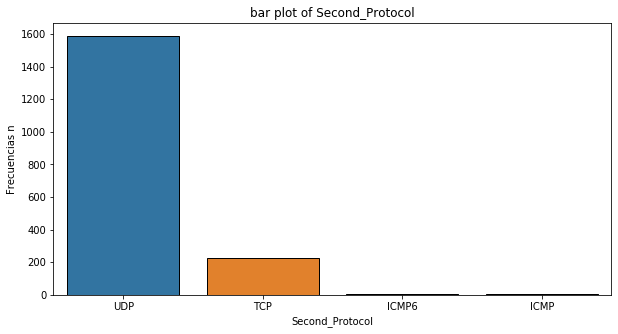

UDP      1587
TCP       228
ICMP6       6
ICMP        3
Name: Second_Protocol, dtype: int64
El segundo protocolo mas utilizado en el conjunto de datos es el UDP con 1587


In [592]:
bar_plot('Second_Protocol')
v = data['Second_Protocol'].value_counts()[0]
print(data['Second_Protocol'].value_counts())
print(f'El segundo protocolo mas utilizado en el conjunto de datos es el UDP con {v}')

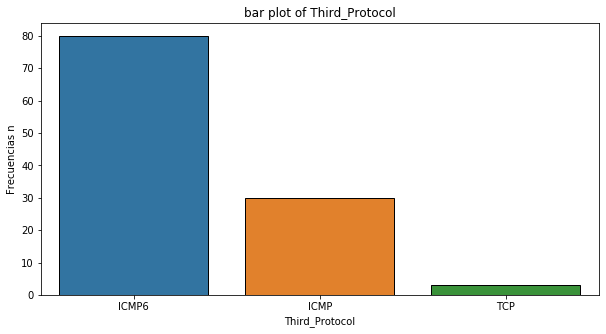

ICMP6    80
ICMP     30
TCP       3
Name: Third_Protocol, dtype: int64
El tercer protocolo mas utilizado en el conjunto de datos es el ICMP6 80


In [593]:
bar_plot('Third_Protocol')
v = data['Third_Protocol'].value_counts()[0]
print(data['Third_Protocol'].value_counts())
print(f'El tercer protocolo mas utilizado en el conjunto de datos es el ICMP6 {v}')

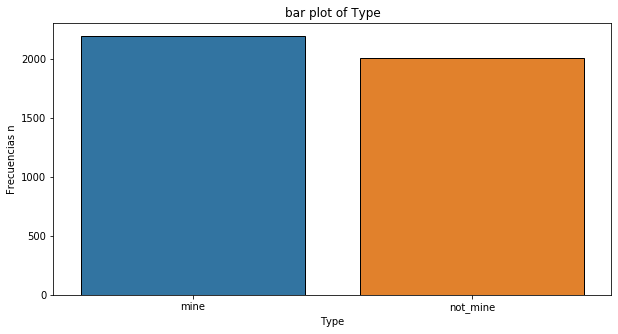

mine        2198
not_mine    2008
Name: Type, dtype: int64
El dataset esta desvalanceado


In [594]:
bar_plot('Type')
print(data['Type'].value_counts())
print(f'El dataset esta desvalanceado')

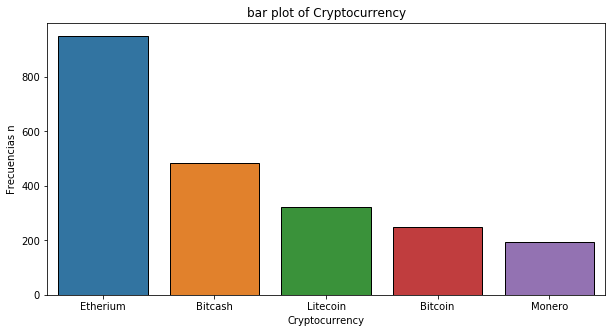

Etherium    950
Bitcash     485
Litecoin    324
Bitcoin     247
Monero      192
Name: Cryptocurrency, dtype: int64
La criptomoneda con mas registros es Etherium


In [595]:
bar_plot('Cryptocurrency')
print(data['Cryptocurrency'].value_counts())
print(f'La criptomoneda con mas registros es Etherium')

In [596]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

12

                      p1_d    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)  2320    0.551593  2320  0.551593  24.9805
1     (49.96108, 99.92216)   262    0.062292  2582  0.613885  74.9416
2    (99.92216, 149.88324)   114   0.0271041  2696  0.640989  124.903
3   (149.88324, 199.84432)    76   0.0180694  2772  0.659058  174.864
4    (199.84432, 249.8054)   258   0.0613409  3030  0.720399  224.825
5    (249.8054, 299.76648)   483    0.114836  3513  0.835235  274.786
6   (299.76648, 349.72756)    94    0.022349  3607  0.857584  324.747
7   (349.72756, 399.68864)    38  0.00903471  3645  0.866619  374.708
8   (399.68864, 449.64972)    29  0.00689491  3674  0.873514  424.669
9    (449.64972, 499.6108)    41  0.00974798  3715  0.883262   474.63
10   (499.6108, 549.57188)   199   0.0473134  3914  0.930575  524.591
11    (549.57188, 599.533)   292   0.0694246  4206         1  574.552
12                   Total  4206                                     


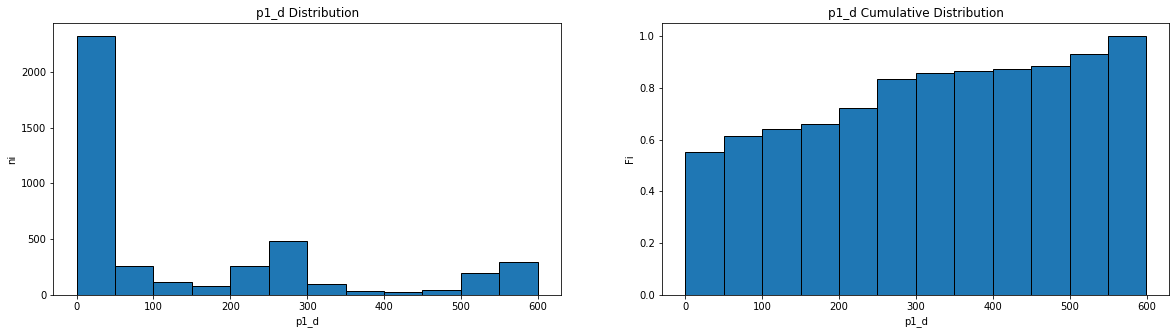

In [597]:
print(tables_frequency[0])
hist_plot(data_numeric_float[0],m)

                      p2_d    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)  1929    0.458631  1929  0.458631  24.9805
1     (49.96108, 99.92216)   351   0.0834522  2280  0.542083  74.9416
2    (99.92216, 149.88324)   263   0.0625297  2543  0.604612  124.903
3   (149.88324, 199.84432)   170   0.0404184  2713  0.645031  174.864
4    (199.84432, 249.8054)   310   0.0737042  3023  0.718735  224.825
5    (249.8054, 299.76648)   486    0.115549  3509  0.834284  274.786
6   (299.76648, 349.72756)    93   0.0221113  3602  0.856396  324.747
7   (349.72756, 399.68864)    34  0.00808369  3636  0.864479  374.708
8   (399.68864, 449.64972)    38  0.00903471  3674  0.873514  424.669
9    (449.64972, 499.6108)    40  0.00951022  3714  0.883024   474.63
10   (499.6108, 549.57188)   200   0.0475511  3914  0.930575  524.591
11    (549.57188, 599.533)   292   0.0694246  4206         1  574.552
12                   Total  4206                                     


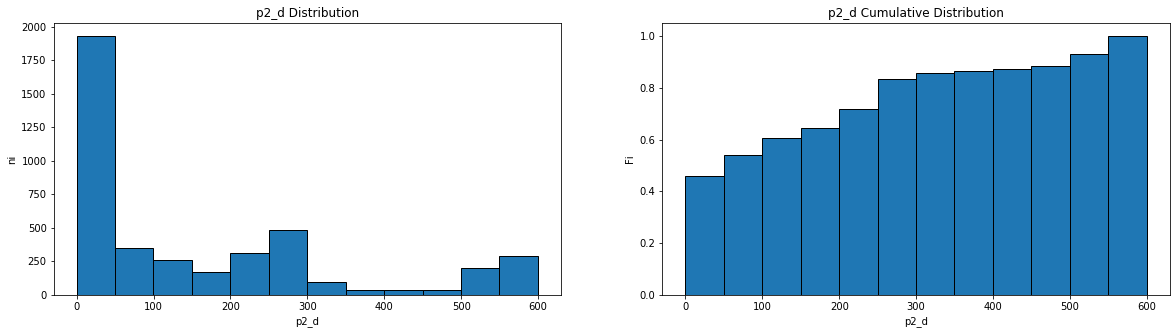

In [598]:
print(tables_frequency[1])
hist_plot(data_numeric_float[1],m)

                      p3_d    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)  1468    0.349025  1468  0.349025  24.9805
1     (49.96108, 99.92216)   508     0.12078  1976  0.469805  74.9416
2    (99.92216, 149.88324)   355   0.0844032  2331  0.554208  124.903
3   (149.88324, 199.84432)   208   0.0494532  2539  0.603661  174.864
4    (199.84432, 249.8054)   440    0.104612  2979  0.708274  224.825
5    (249.8054, 299.76648)   515    0.122444  3494  0.830718  274.786
6   (299.76648, 349.72756)   102   0.0242511  3596  0.854969  324.747
7   (349.72756, 399.68864)    36   0.0085592  3632  0.863528  374.708
8   (399.68864, 449.64972)    28  0.00665716  3660  0.870185  424.669
9    (449.64972, 499.6108)    47   0.0111745  3707   0.88136   474.63
10   (499.6108, 549.57188)   205   0.0487399  3912    0.9301  524.591
11    (549.57188, 599.533)   294   0.0699001  4206         1  574.552
12                   Total  4206                                     


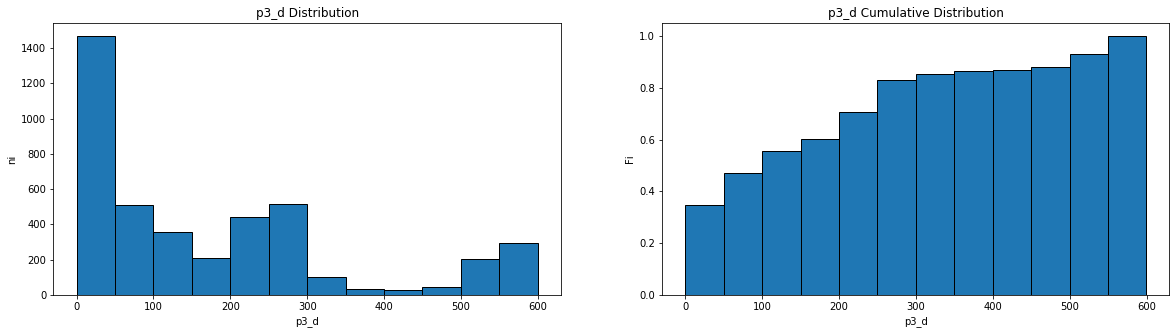

In [599]:
print(tables_frequency[2])
hist_plot(data_numeric_float[2],m)

                   duration    ni           fi    Ni        Fi       Xí
0          (0.0, 7793.1585)  3710     0.882073  3710  0.882073  3896.58
1    (7793.1585, 15586.317)   293    0.0696624  4003  0.951736  11689.7
2   (15586.317, 23379.4755)    97    0.0230623  4100  0.974798  19482.9
3   (23379.4755, 31172.634)    48    0.0114123  4148   0.98621  27276.1
4   (31172.634, 38965.7925)    20   0.00475511  4168  0.990965  35069.2
5   (38965.7925, 46758.951)    14   0.00332858  4182  0.994294  42862.4
6   (46758.951, 54552.1095)    13   0.00309082  4195  0.997385  50655.5
7   (54552.1095, 62345.268)     5   0.00118878  4200  0.998573  58448.7
8   (62345.268, 70138.4265)     1  0.000237756  4201  0.998811  66241.8
9   (70138.4265, 77931.585)     3  0.000713267  4204  0.999524    74035
10  (77931.585, 85724.7435)     1  0.000237756  4205  0.999762  81828.2
11  (85724.7435, 93517.902)     1  0.000237756  4206         1  89621.3
12                    Total  4206                               

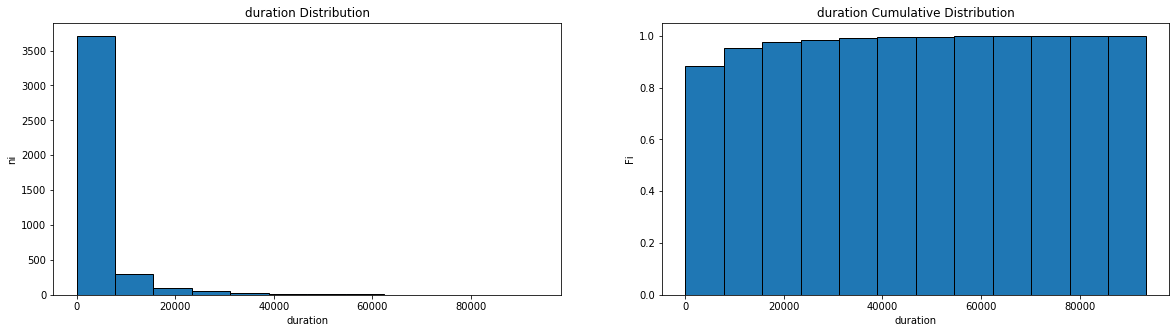

In [600]:
print(tables_frequency[3])
hist_plot(data_numeric_float[3],m)

                     max_d    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)   530     0.12601   530   0.12601  24.9805
1     (49.96108, 99.92216)   617    0.146695  1147  0.272706  74.9416
2    (99.92216, 149.88324)   623    0.148122  1770  0.420827  124.903
3   (149.88324, 199.84432)   362   0.0860675  2132  0.506895  174.864
4    (199.84432, 249.8054)   525    0.124822  2657  0.631717  224.825
5    (249.8054, 299.76648)   764    0.181645  3421  0.813362  274.786
6   (299.76648, 349.72756)   155   0.0368521  3576  0.850214  324.747
7   (349.72756, 399.68864)    51   0.0121255  3627   0.86234  374.708
8   (399.68864, 449.64972)    33  0.00784593  3660  0.870185  424.669
9    (449.64972, 499.6108)    43   0.0102235  3703  0.880409   474.63
10   (499.6108, 549.57188)   200   0.0475511  3903   0.92796  524.591
11    (549.57188, 599.533)   303   0.0720399  4206         1  574.552
12                   Total  4206                                     


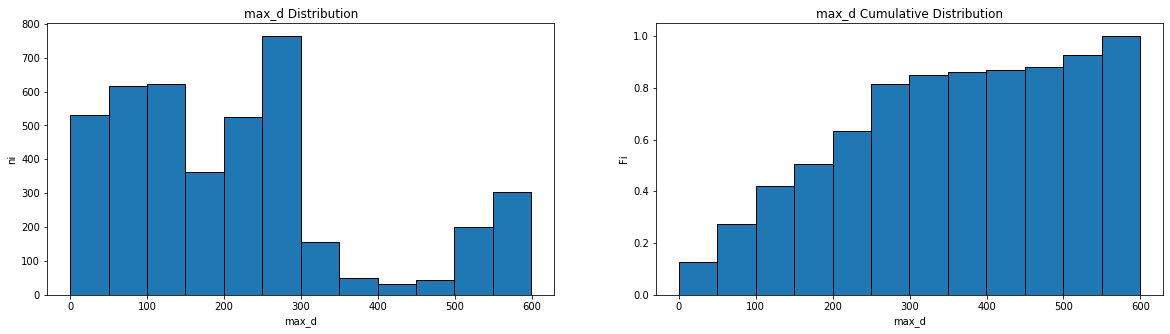

In [601]:
print(tables_frequency[4])
hist_plot(data_numeric_float[4],m)

                     min_d    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)  2668    0.634332  2668  0.634332  24.9805
1     (49.96108, 99.92216)    57   0.0135521  2725  0.647884  74.9416
2    (99.92216, 149.88324)    28  0.00665716  2753  0.654541  124.903
3   (149.88324, 199.84432)    27   0.0064194  2780  0.660961  174.864
4    (199.84432, 249.8054)   252   0.0599144  3032  0.720875  224.825
5    (249.8054, 299.76648)   492    0.116976  3524  0.837851  274.786
6   (299.76648, 349.72756)    89   0.0211602  3613  0.859011  324.747
7   (349.72756, 399.68864)    33  0.00784593  3646  0.866857  374.708
8   (399.68864, 449.64972)    28  0.00665716  3674  0.873514  424.669
9    (449.64972, 499.6108)    41  0.00974798  3715  0.883262   474.63
10   (499.6108, 549.57188)   200   0.0475511  3915  0.930813  524.591
11    (549.57188, 599.533)   291   0.0691869  4206         1  574.552
12                   Total  4206                                     


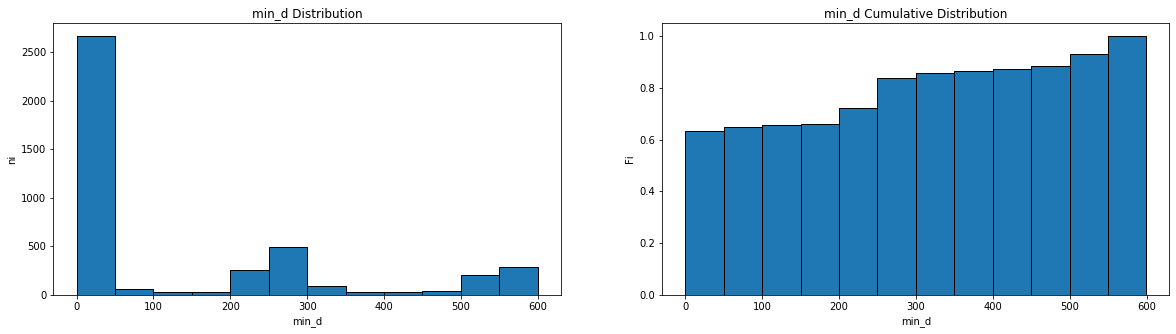

In [602]:
print(tables_frequency[5])
hist_plot(data_numeric_float[5],m)

                     second_sp    ni          fi    Ni        Fi       Xí
0            (0.0, 5399.16667)  2303    0.550825  2303  0.550825  2699.58
1    (5399.16667, 10798.33334)     0           0  2303  0.550825  8098.75
2   (10798.33334, 16197.50001)   190   0.0454437  2493  0.596269  13497.9
3   (16197.50001, 21596.66668)     0           0  2493  0.596269  18897.1
4   (21596.66668, 26995.83335)     0           0  2493  0.596269  24296.3
5   (26995.83335, 32395.00002)     0           0  2493  0.596269  29695.4
6   (32395.00002, 37794.16669)    32  0.00765367  2525  0.603923  35094.6
7   (37794.16669, 43193.33336)    35   0.0083712  2560  0.612294  40493.8
8   (43193.33336, 48592.50003)    35   0.0083712  2595  0.620665  45892.9
9    (48592.50003, 53991.6667)   545    0.130352  3140  0.751017  51292.1
10   (53991.6667, 59390.83337)   940    0.224827  4080  0.975843  56691.3
11      (59390.83337, 64790.0)   101   0.0241569  4181         1  62090.4
12                       Total  4181  

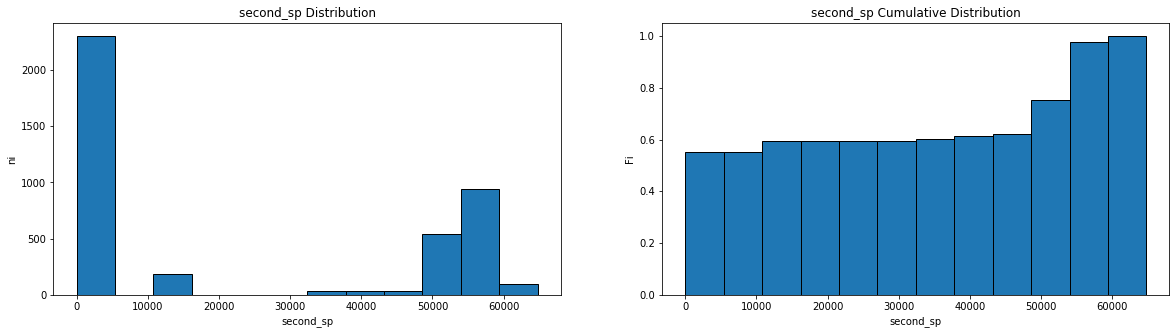

In [603]:
print(tables_frequency[6])
hist_plot(data_numeric_float[6],m)

                      third_sp    ni          fi    Ni        Fi       Xí
0            (0.0, 5453.91667)  1325    0.637019  1325  0.637019  2726.96
1    (5453.91667, 10907.83334)     3  0.00144231  1328  0.638462  8180.88
2   (10907.83334, 16361.75001)     0           0  1328  0.638462  13634.8
3   (16361.75001, 21815.66668)     0           0  1328  0.638462  19088.7
4   (21815.66668, 27269.58335)     0           0  1328  0.638462  24542.6
5   (27269.58335, 32723.50002)     0           0  1328  0.638462  29996.5
6   (32723.50002, 38177.41669)   126   0.0605769  1454  0.699038  35450.5
7   (38177.41669, 43631.33336)    89   0.0427885  1543  0.741827  40904.4
8   (43631.33336, 49085.25003)   115   0.0552885  1658  0.797115  46358.3
9    (49085.25003, 54539.1667)   225    0.108173  1883  0.905288  51812.2
10   (54539.1667, 59993.08337)   151   0.0725962  2034  0.977885  57266.1
11      (59993.08337, 65447.0)    46   0.0221154  2080         1    62720
12                       Total  2080  

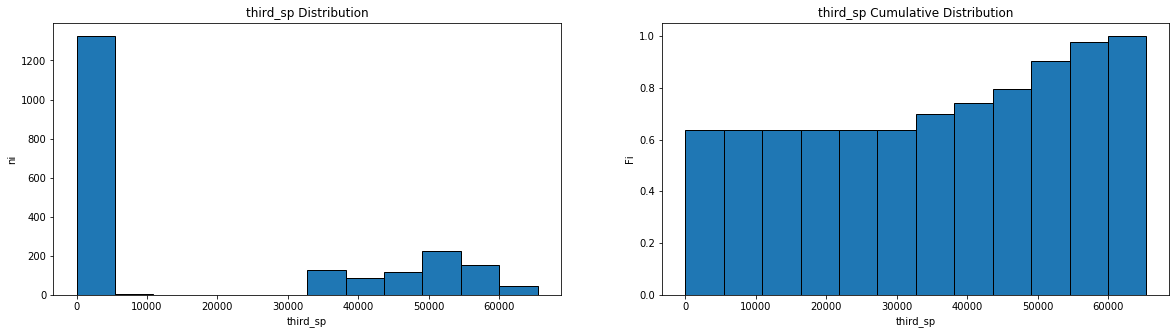

In [604]:
print(tables_frequency[7])
hist_plot(data_numeric_float[7],m)

              second_dp    ni          fi    Ni        Fi       Xí
0       (53.0, 5447.75)  2387    0.570916  2387  0.570916  2750.38
1    (5447.75, 10842.5)     0           0  2387  0.570916  8145.12
2   (10842.5, 16237.25)   190   0.0454437  2577   0.61636  13539.9
3   (16237.25, 21632.0)     0           0  2577   0.61636  18934.6
4   (21632.0, 27026.75)     0           0  2577   0.61636  24329.4
5   (27026.75, 32421.5)     0           0  2577   0.61636  29724.1
6   (32421.5, 37816.25)    35   0.0083712  2612  0.624731  35118.9
7   (37816.25, 43211.0)    32  0.00765367  2644  0.632385  40513.6
8   (43211.0, 48605.75)    29  0.00693614  2673  0.639321  45908.4
9   (48605.75, 54000.5)   551    0.131787  3224  0.771107  51303.1
10  (54000.5, 59395.25)   861    0.205932  4085  0.977039  56697.9
11  (59395.25, 64790.0)    96    0.022961  4181         1  62092.6
12                Total  4181                                     


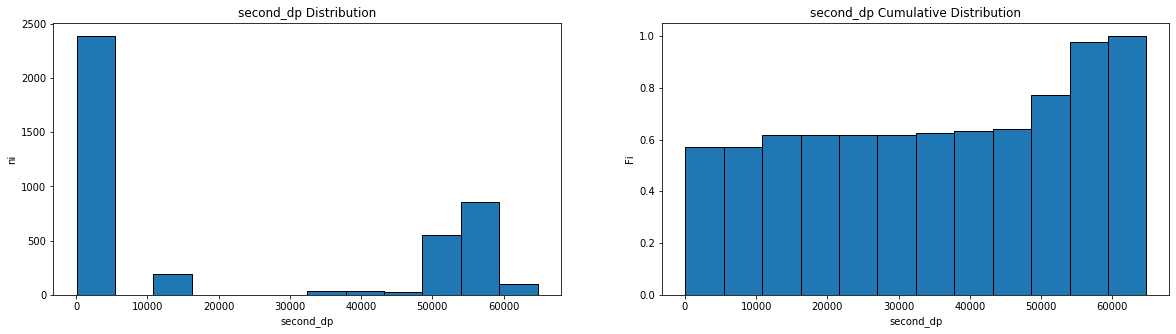

In [605]:
print(tables_frequency[8])
hist_plot(data_numeric_float[8],m)

              third_dp    ni         fi    Ni        Fi     Xí
0       (53.0, 5131.0)  1621   0.779327  1621  0.779327   2592
1    (5131.0, 10209.0)    53  0.0254808  1674  0.804808   7670
2   (10209.0, 15287.0)     0          0  1674  0.804808  12748
3   (15287.0, 20365.0)     0          0  1674  0.804808  17826
4   (20365.0, 25443.0)     0          0  1674  0.804808  22904
5   (25443.0, 30521.0)     0          0  1674  0.804808  27982
6   (30521.0, 35599.0)    30  0.0144231  1704  0.819231  33060
7   (35599.0, 40677.0)    48  0.0230769  1752  0.842308  38138
8   (40677.0, 45755.0)    42  0.0201923  1794    0.8625  43216
9   (45755.0, 50833.0)    51  0.0245192  1845  0.887019  48294
10  (50833.0, 55911.0)   163  0.0783654  2008  0.965385  53372
11  (55911.0, 60989.0)    72  0.0346154  2080         1  58450
12               Total  2080                                  


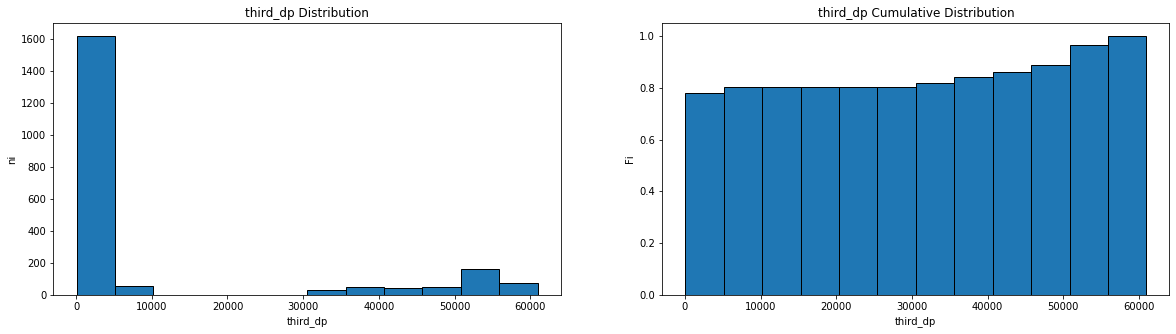

In [606]:
print(tables_frequency[9])
hist_plot(data_numeric_float[9],m)

                     p1_ip    ni           fi    Ni        Fi       Xí
0          (1.0, 33.33333)  3669     0.872325  3669  0.872325  17.1667
1     (33.33333, 65.66666)   202    0.0480266  3871  0.920352     49.5
2     (65.66666, 97.99999)     7   0.00166429  3878  0.922016  81.8333
3    (97.99999, 130.33332)     4  0.000951022  3882  0.922967  114.167
4   (130.33332, 162.66665)    21   0.00499287  3903   0.92796    146.5
5   (162.66665, 194.99998)   150    0.0356633  4053  0.963623  178.833
6   (194.99998, 227.33331)    36    0.0085592  4089  0.972183  211.167
7   (227.33331, 259.66664)    18    0.0042796  4107  0.976462    243.5
8   (259.66664, 291.99997)    17   0.00404184  4124  0.980504  275.833
9    (291.99997, 324.3333)    17   0.00404184  4141  0.984546  308.167
10   (324.3333, 356.66663)    59    0.0140276  4200  0.998573    340.5
11      (356.66663, 389.0)     6   0.00142653  4206         1  372.833
12                   Total  4206                                      


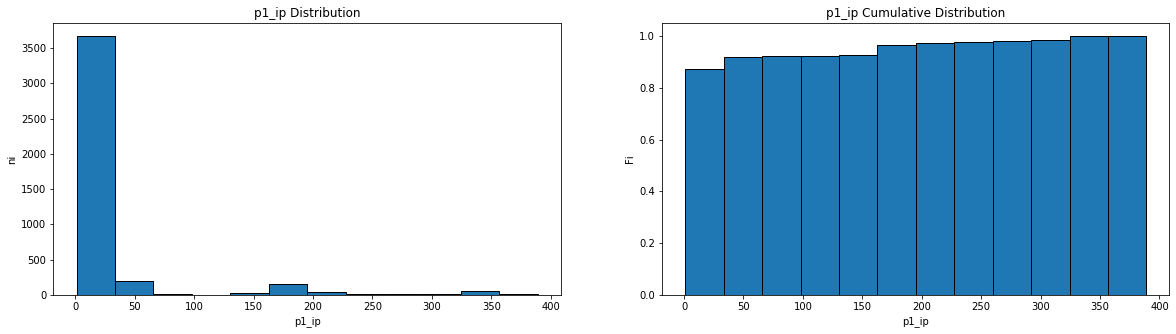

In [607]:
print(tables_frequency[10])
hist_plot(data_numeric_float[10],m)

                     p2_ip    ni          fi    Ni        Fi       Xí
0          (1.0, 33.83333)  3594    0.854494  3594  0.854494  17.4167
1     (33.83333, 66.66666)   246   0.0584879  3840  0.912981    50.25
2     (66.66666, 99.49999)    31  0.00737042  3871  0.920352  83.0833
3    (99.49999, 132.33332)     8  0.00190204  3879  0.922254  115.917
4   (132.33332, 165.16665)    13  0.00309082  3892  0.925345   148.75
5   (165.16665, 197.99998)   157   0.0373276  4049  0.962672  181.583
6   (197.99998, 230.83331)    38  0.00903471  4087  0.971707  214.417
7   (230.83331, 263.66664)    19  0.00451736  4106  0.976224   247.25
8   (263.66664, 296.49997)    17  0.00404184  4123  0.980266  280.083
9    (296.49997, 329.3333)    12  0.00285307  4135  0.983119  312.917
10   (329.3333, 362.16663)    62   0.0147408  4197   0.99786   345.75
11      (362.16663, 395.0)     9   0.0021398  4206         1  378.583
12                   Total  4206                                     


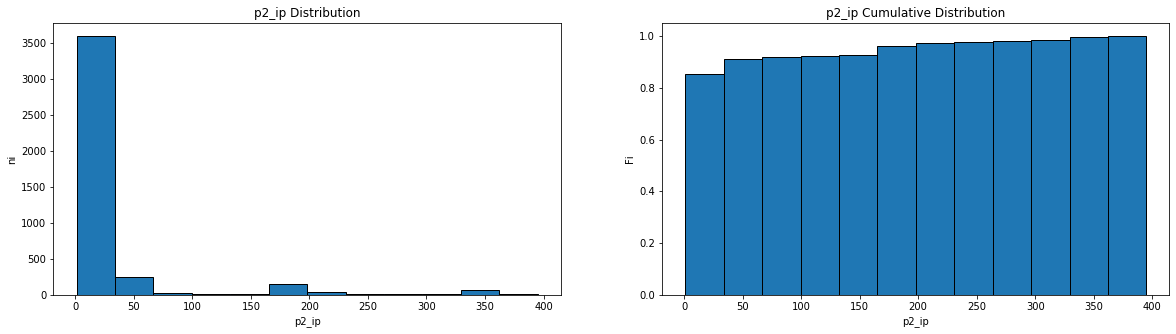

In [608]:
print(tables_frequency[11])
hist_plot(data_numeric_float[11],m)

                     p3_ip    ni          fi    Ni        Fi       Xí
0          (1.0, 34.33333)  3429    0.815264  3429  0.815264  17.6667
1     (34.33333, 67.66666)   339   0.0805991  3768  0.895863       51
2    (67.66666, 100.99999)    56   0.0133143  3824  0.909177  84.3333
3   (100.99999, 134.33332)    29  0.00689491  3853  0.916072  117.667
4   (134.33332, 167.66665)    20  0.00475511  3873  0.920827      151
5   (167.66665, 200.99998)   169   0.0401807  4042  0.961008  184.333
6   (200.99998, 234.33331)    40  0.00951022  4082  0.970518  217.667
7   (234.33331, 267.66664)    19  0.00451736  4101  0.975036      251
8   (267.66664, 300.99997)    18   0.0042796  4119  0.979315  284.333
9    (300.99997, 334.3333)    13  0.00309082  4132  0.982406  317.667
10   (334.3333, 367.66663)    57   0.0135521  4189  0.995958      351
11      (367.66663, 401.0)    17  0.00404184  4206         1  384.333
12                   Total  4206                                     


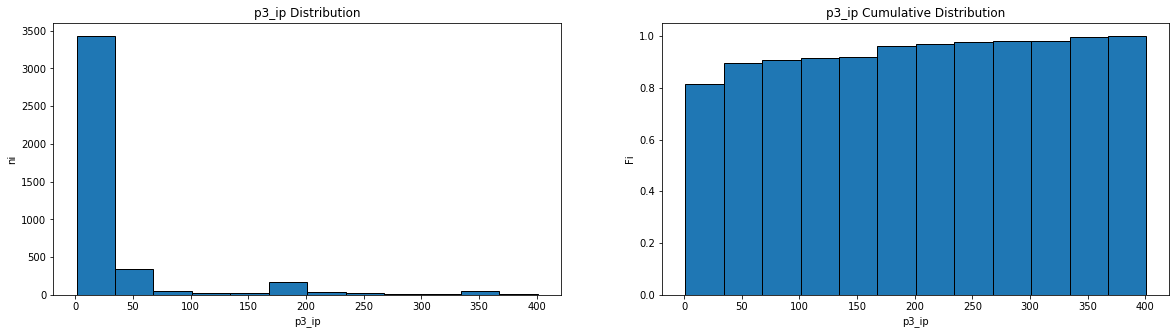

In [609]:
print(tables_frequency[12])
hist_plot(data_numeric_float[12],m)

                         p1_ib    ni           fi    Ni        Fi       Xí
0           (16.0, 3376.83333)  3113     0.740133  3113  0.740133  1696.42
1     (3376.83333, 6737.66666)   565     0.134332  3678  0.874465  5057.25
2    (6737.66666, 10098.49999)   188    0.0446981  3866  0.919163  8418.08
3   (10098.49999, 13459.33332)    19   0.00451736  3885   0.92368  11778.9
4   (13459.33332, 16820.16665)   128    0.0304327  4013  0.954113  15139.7
5   (16820.16665, 20180.99998)    64    0.0152164  4077   0.96933  18500.6
6   (20180.99998, 23541.83331)    24   0.00570613  4101  0.975036  21861.4
7   (23541.83331, 26902.66664)    21   0.00499287  4122  0.980029  25222.2
8   (26902.66664, 30263.49997)    15   0.00356633  4137  0.983595  28583.1
9    (30263.49997, 33624.3333)    65    0.0154541  4202  0.999049  31943.9
10   (33624.3333, 36985.16663)     3  0.000713267  4205  0.999762  35304.7
11      (36985.16663, 40346.0)     1  0.000237756  4206         1  38665.6
12                       

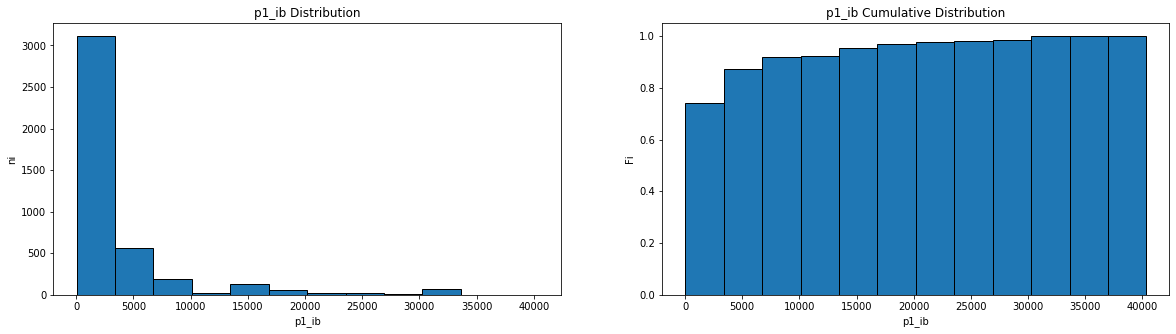

In [610]:
print(tables_frequency[13])
hist_plot(data_numeric_float[13],m)

                         p2_ib    ni          fi    Ni        Fi       Xí
0           (20.0, 4425.16667)  2892    0.687589  2892  0.687589  2222.58
1     (4425.16667, 8830.33334)   579     0.13766  3471   0.82525  6627.75
2    (8830.33334, 13235.50001)   233   0.0553971  3704  0.880647  11032.9
3   (13235.50001, 17640.66668)   148   0.0351878  3852  0.915835  15438.1
4   (17640.66668, 22045.83335)    37  0.00879696  3889  0.924631  19843.3
5   (22045.83335, 26451.00002)   151   0.0359011  4040  0.960533  24248.4
6   (26451.00002, 30856.16669)    44   0.0104612  4084  0.970994  28653.6
7   (30856.16669, 35261.33336)    17  0.00404184  4101  0.975036  33058.8
8   (35261.33336, 39666.50003)    18   0.0042796  4119  0.979315  37463.9
9    (39666.50003, 44071.6667)    16  0.00380409  4135  0.983119  41869.1
10   (44071.6667, 48476.83337)    55   0.0130766  4190  0.996196  46274.3
11      (48476.83337, 52882.0)    16  0.00380409  4206         1  50679.4
12                       Total  4206  

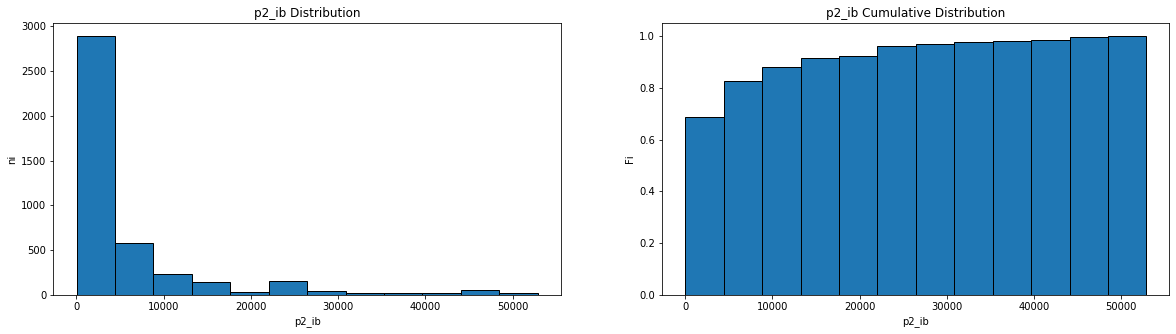

In [611]:
print(tables_frequency[14])
hist_plot(data_numeric_float[14],m)

                         p3_ib    ni          fi    Ni        Fi       Xí
0           (28.5, 5945.04167)  2681    0.637423  2681  0.637423  2986.77
1    (5945.04167, 11861.58334)   627    0.149073  3308  0.786495  8903.31
2   (11861.58334, 17778.12501)   349   0.0829767  3657  0.869472  14819.9
3   (17778.12501, 23694.66668)   150   0.0356633  3807  0.905136  20736.4
4   (23694.66668, 29611.20835)    81   0.0192582  3888  0.924394  26652.9
5   (29611.20835, 35527.75002)   155   0.0368521  4043  0.961246  32569.5
6   (35527.75002, 41444.29169)    42  0.00998573  4085  0.971232    38486
7   (41444.29169, 47360.83336)    19  0.00451736  4104  0.975749  44402.6
8   (47360.83336, 53277.37503)    16  0.00380409  4120  0.979553  50319.1
9    (53277.37503, 59193.9167)    16  0.00380409  4136  0.983357  56235.6
10   (59193.9167, 65110.45837)    56   0.0133143  4192  0.996671  62152.2
11      (65110.45837, 71027.0)    14  0.00332858  4206         1  68068.7
12                       Total  4206  

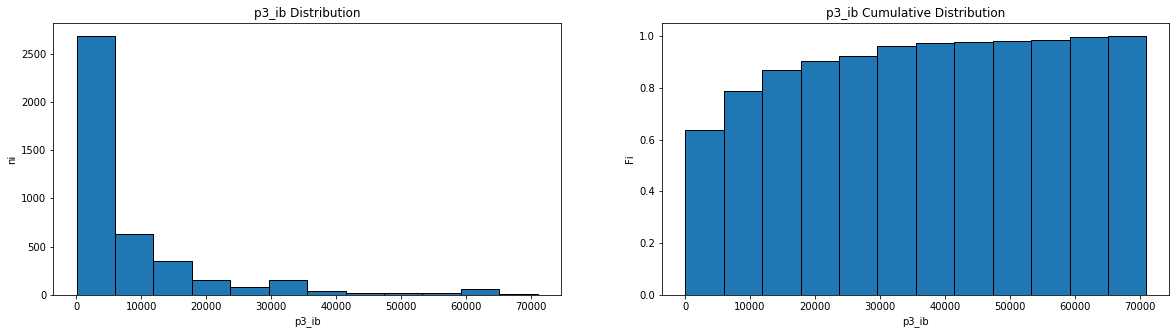

In [612]:
print(tables_frequency[15])
hist_plot(data_numeric_float[15],m)

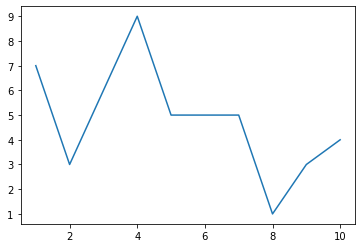

In [613]:
# %%
# Gráfico lineal
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 11)
y = np.random.randint(10, size=10)

plt.plot(x, y)
plt.show()

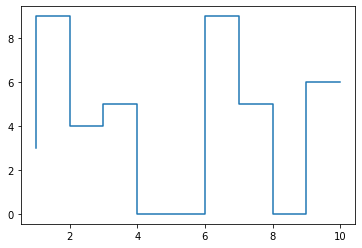

In [614]:
# %%
# Gráfico de escaleras
x = np.arange(1, 11)
y = np.random.randint(10, size=10)

plt.step(x, y)
plt.show()

In [615]:
data_numeric_int

['index',
 'Netflows',
 '#packets',
 'Avg_bps',
 'Avg_pps',
 'Avg_bpp',
 '#Bytes',
 '#sp',
 '#dp',
 'first_sp',
 'first_dp',
 'Id_Cryptocurrency']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


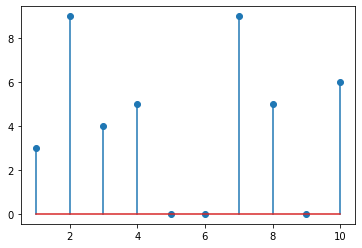

In [616]:
# %%
# Gráfico de líneas verticales
plt.stem(x, y)
plt.show()